In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# **Loading the data**

In [2]:
crop_df = pd.read_csv("datasets/Final/FinalData.csv")
crop_df.head()

,CropItem,Year,Yield(hg/ha),Nutrients(tonnes),SyntheticFert(tonnes),Pesticides(tonnes),Temp_ann_degC,LandUsed,LandIrrigated
0,"Anise, badian, fennel, coriander",1990,5912.0,150225,132396,937,24.21,2267,618.0
1,"Anise, badian, fennel, coriander",1991,4797.0,159101,140809,901,24.28,2269,621.0
2,"Anise, badian, fennel, coriander",1992,4632.0,151930,147467,884,24.15,2266,623.0
3,"Anise, badian, fennel, coriander",1993,4117.0,154815,153630,829,24.43,2267,626.0
4,"Anise, badian, fennel, coriander",1994,3589.0,169545,166375,766,24.46,2266,644.0


In [3]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CropItem               2400 non-null   object 
 1   Year                   2400 non-null   int64  
 2   Yield(hg/ha)           2400 non-null   float64
 3   Nutrients(tonnes)      2400 non-null   int64  
 4   SyntheticFert(tonnes)  2400 non-null   int64  
 5   Pesticides(tonnes)     2400 non-null   int64  
 6   Temp_ann_degC          2400 non-null   float64
 7   LandUsed               2400 non-null   int64  
 8   LandIrrigated          2400 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 168.9+ KB


In [4]:
crop_df.describe()

,Year,Yield(hg/ha),Nutrients(tonnes),SyntheticFert(tonnes),Pesticides(tonnes),Temp_ann_degC,LandUsed,LandIrrigated
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,2004.500000,75412.124167,254340.533333,229401.166667,629.533333,24.875667,2253.533333,778.233333
std,8.657245,104678.605006,70868.281876,57607.355579,174.809367,0.568987,8.606960,90.896396
min,1990.000000,809.000000,150225.000000,132396.000000,181.000000,24.100000,2244.000000,618.000000
25%,1997.000000,9590.250000,201199.000000,183211.000000,515.000000,24.580000,2245.000000,700.000000
50%,2004.500000,28923.500000,242212.500000,213820.000000,657.500000,24.730000,2252.000000,803.500000
75%,2012.000000,100327.250000,324363.000000,293126.000000,765.000000,25.060000,2262.000000,869.000000
max,2019.000000,801984.000000,362120.000000,308493.000000,937.000000,26.450000,2269.000000,880.000000


## **Train Test Split**
Splitting the dataset into training set and testing set before exploration to make sure the models are not aware of the testing set

In [5]:
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(crop_df, test_size = 0.2, random_state=42)

print(f"Train set: {train_set.shape}\nTest set: {test_set.shape}")

Train set: (1920, 9)
Test set: (480, 9)


In [6]:
crop_df = train_set.copy()
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 120 to 860
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CropItem               1920 non-null   object 
 1   Year                   1920 non-null   int64  
 2   Yield(hg/ha)           1920 non-null   float64
 3   Nutrients(tonnes)      1920 non-null   int64  
 4   SyntheticFert(tonnes)  1920 non-null   int64  
 5   Pesticides(tonnes)     1920 non-null   int64  
 6   Temp_ann_degC          1920 non-null   float64
 7   LandUsed               1920 non-null   int64  
 8   LandIrrigated          1920 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 150.0+ KB


In [7]:
crop_df.head()

,CropItem,Year,Yield(hg/ha),Nutrients(tonnes),SyntheticFert(tonnes),Pesticides(tonnes),Temp_ann_degC,LandUsed,LandIrrigated
120,Bananas,1990,195973.0,150225,132396,937,24.21,2267,618.0
283,Berries nes,2003,59192.0,210090,193862,515,24.72,2253,790.0
1727,Plums and sloes,2007,77436.0,282138,252309,342,24.77,2245,822.0
1984,Sesame seed,1994,2993.0,169545,166375,766,24.46,2266,644.0
647,Coconuts,2007,56155.0,282138,252309,342,24.77,2245,822.0


In [8]:
crop_df.describe()

,Year,Yield(hg/ha),Nutrients(tonnes),SyntheticFert(tonnes),Pesticides(tonnes),Temp_ann_degC,LandUsed,LandIrrigated
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,2004.325000,76574.395052,252721.282812,228280.950000,632.469792,24.870339,2253.716667,776.091667
std,8.705332,105406.724023,70913.766216,57787.468781,175.041298,0.568056,8.692892,91.988240
min,1990.000000,809.000000,150225.000000,132396.000000,181.000000,24.100000,2244.000000,618.000000
25%,1997.000000,9776.500000,201199.000000,183211.000000,515.000000,24.580000,2245.000000,700.000000
50%,2004.000000,29204.500000,230083.000000,204972.000000,662.000000,24.730000,2253.000000,799.000000
75%,2012.000000,102820.750000,324363.000000,293126.000000,765.000000,25.060000,2262.000000,869.000000
max,2019.000000,801984.000000,362120.000000,308493.000000,937.000000,26.450000,2269.000000,880.000000


# **Visualizing the training set to gain insights**

### **Correlation Matrix**

In [9]:
# correlation matrix 
corr_matrix = crop_df.corr()
corr_matrix

,Year,Yield(hg/ha),Nutrients(tonnes),SyntheticFert(tonnes),Pesticides(tonnes),Temp_ann_degC,LandUsed,LandIrrigated
Year,1.000000,0.070789,0.959486,0.971253,-0.273981,0.712487,-0.949213,0.970653
Yield(hg/ha),0.070789,1.000000,0.074080,0.074460,-0.030830,0.038088,-0.070786,0.070810
Nutrients(tonnes),0.959486,0.074080,1.000000,0.985412,-0.321448,0.620255,-0.939845,0.939809
SyntheticFert(tonnes),0.971253,0.074460,0.985412,1.000000,-0.282264,0.623141,-0.947224,0.944630
Pesticides(tonnes),-0.273981,-0.030830,-0.321448,-0.282264,1.000000,0.022585,0.425724,-0.453817
Temp_ann_degC,0.712487,0.038088,0.620255,0.623141,0.022585,1.000000,-0.622525,0.623765
LandUsed,-0.949213,-0.070786,-0.939845,-0.947224,0.425724,-0.622525,1.000000,-0.956920
LandIrrigated,0.970653,0.070810,0.939809,0.944630,-0.453817,0.623765,-0.956920,1.000000


In [10]:
corr_matrix["Yield(hg/ha)"]

Year                     0.070789
Yield(hg/ha)             1.000000
Nutrients(tonnes)        0.074080
SyntheticFert(tonnes)    0.074460
Pesticides(tonnes)      -0.030830
Temp_ann_degC            0.038088
LandUsed                -0.070786
LandIrrigated            0.070810
Name: Yield(hg/ha), dtype: float64

### **Heat Map**

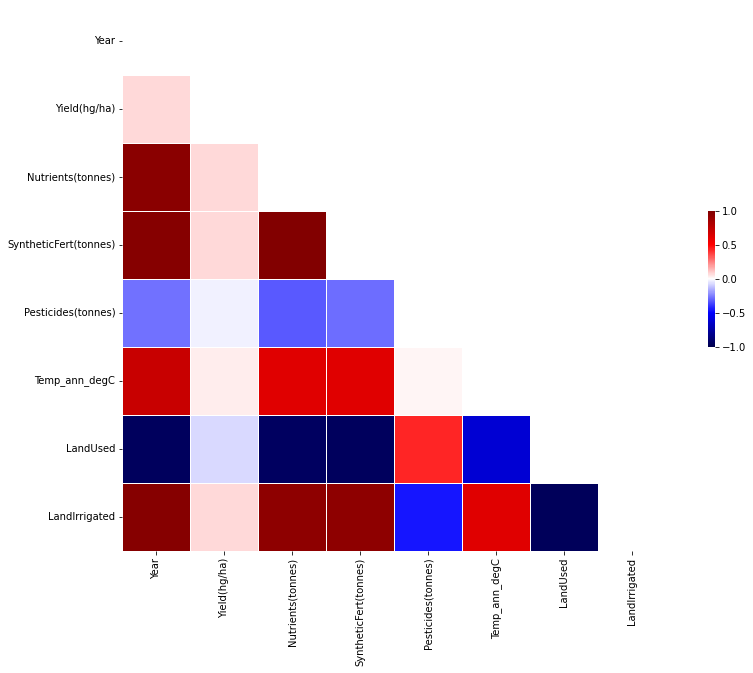

In [11]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

figure, axes = plt.subplots(figsize=(15, 10))
cmap = sns.palette = "seismic"

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.25})
plt.show()

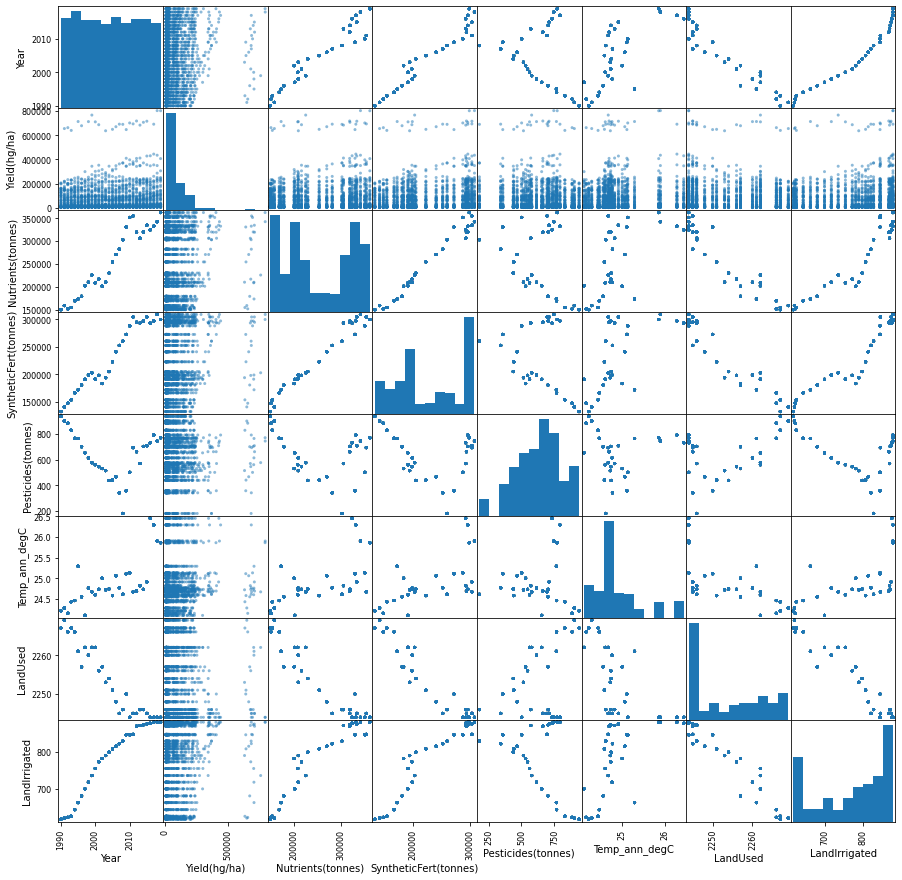

In [12]:
from pandas.plotting import scatter_matrix 

attributes = list(crop_df.columns)
attributes.remove("CropItem")

scatter_matrix(crop_df[attributes], figsize=(15, 15))
plt.show()

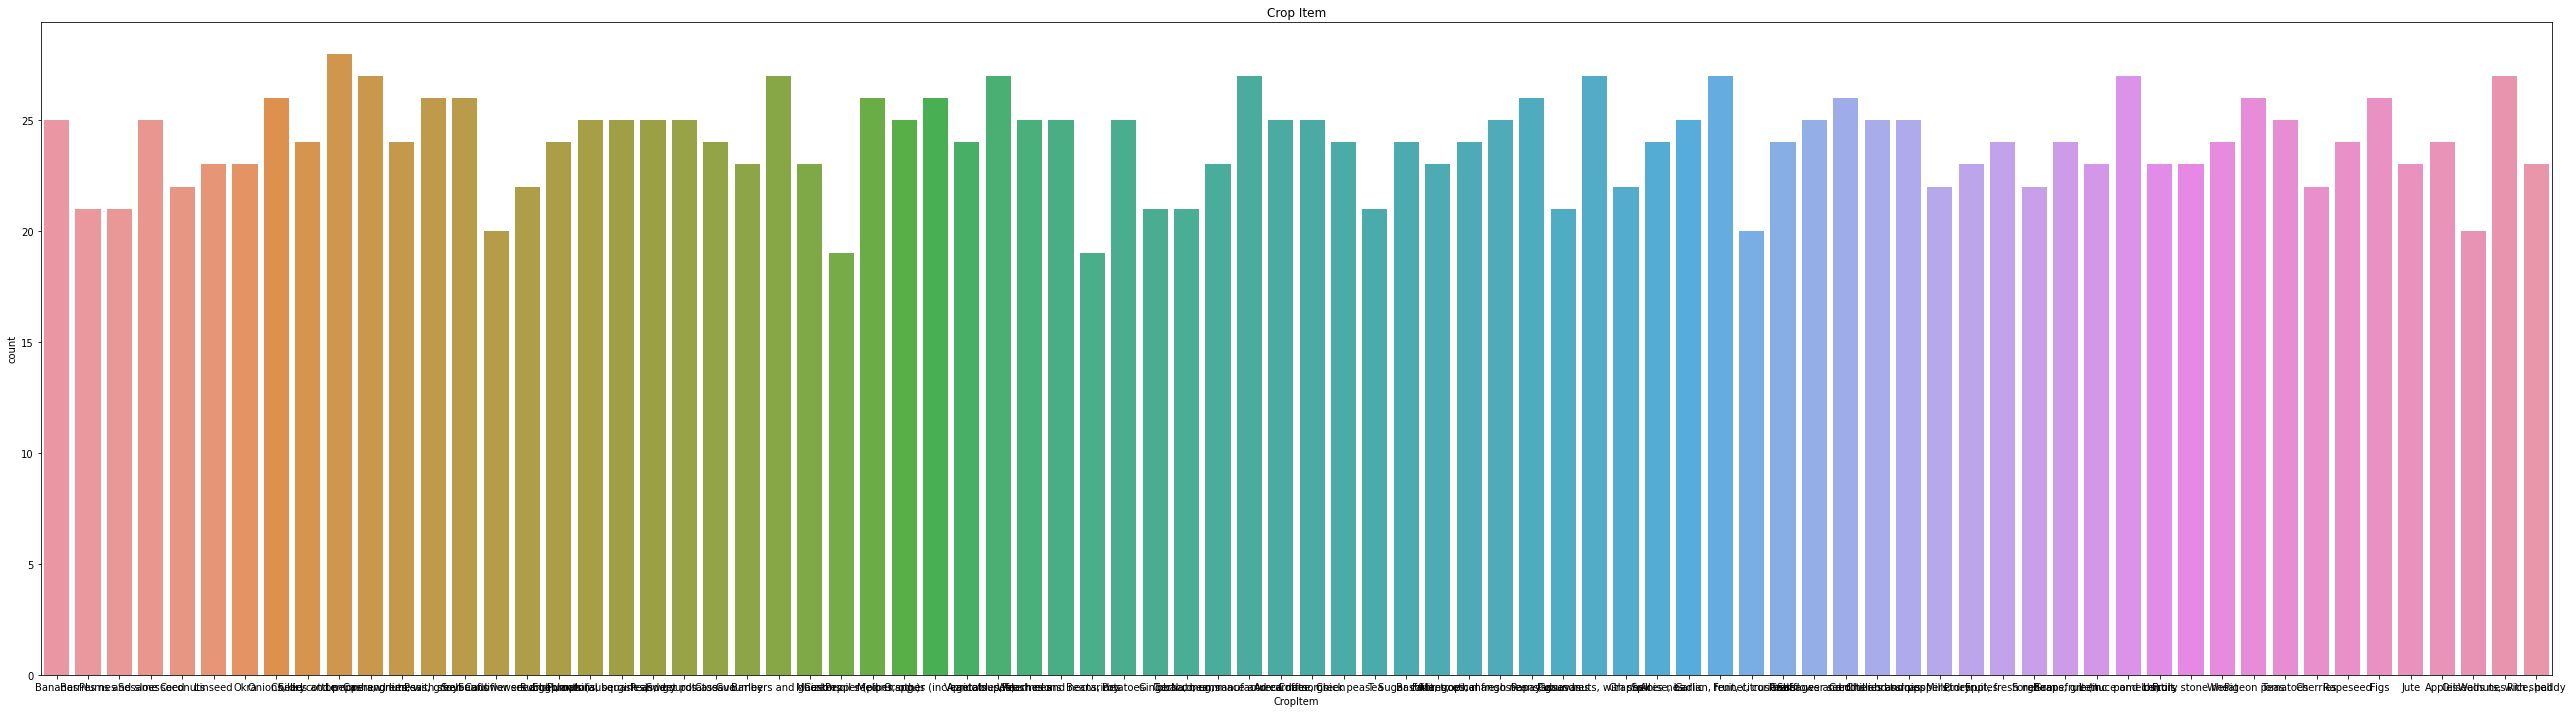

In [13]:
fig, ax = plt.subplots(figsize=(45, 12))
sns.countplot(x="CropItem", data=crop_df, ax=ax)
ax.set_title("Crop Item")
plt.show()

In [14]:
crop_df.columns

Index(['CropItem', 'Year', 'Yield(hg/ha)', 'Nutrients(tonnes)',
       'SyntheticFert(tonnes)', 'Pesticides(tonnes)', 'Temp_ann_degC',
       'LandUsed', 'LandIrrigated'],
      dtype='object')

## **Preprocessing and getting the data ready for training**

[]

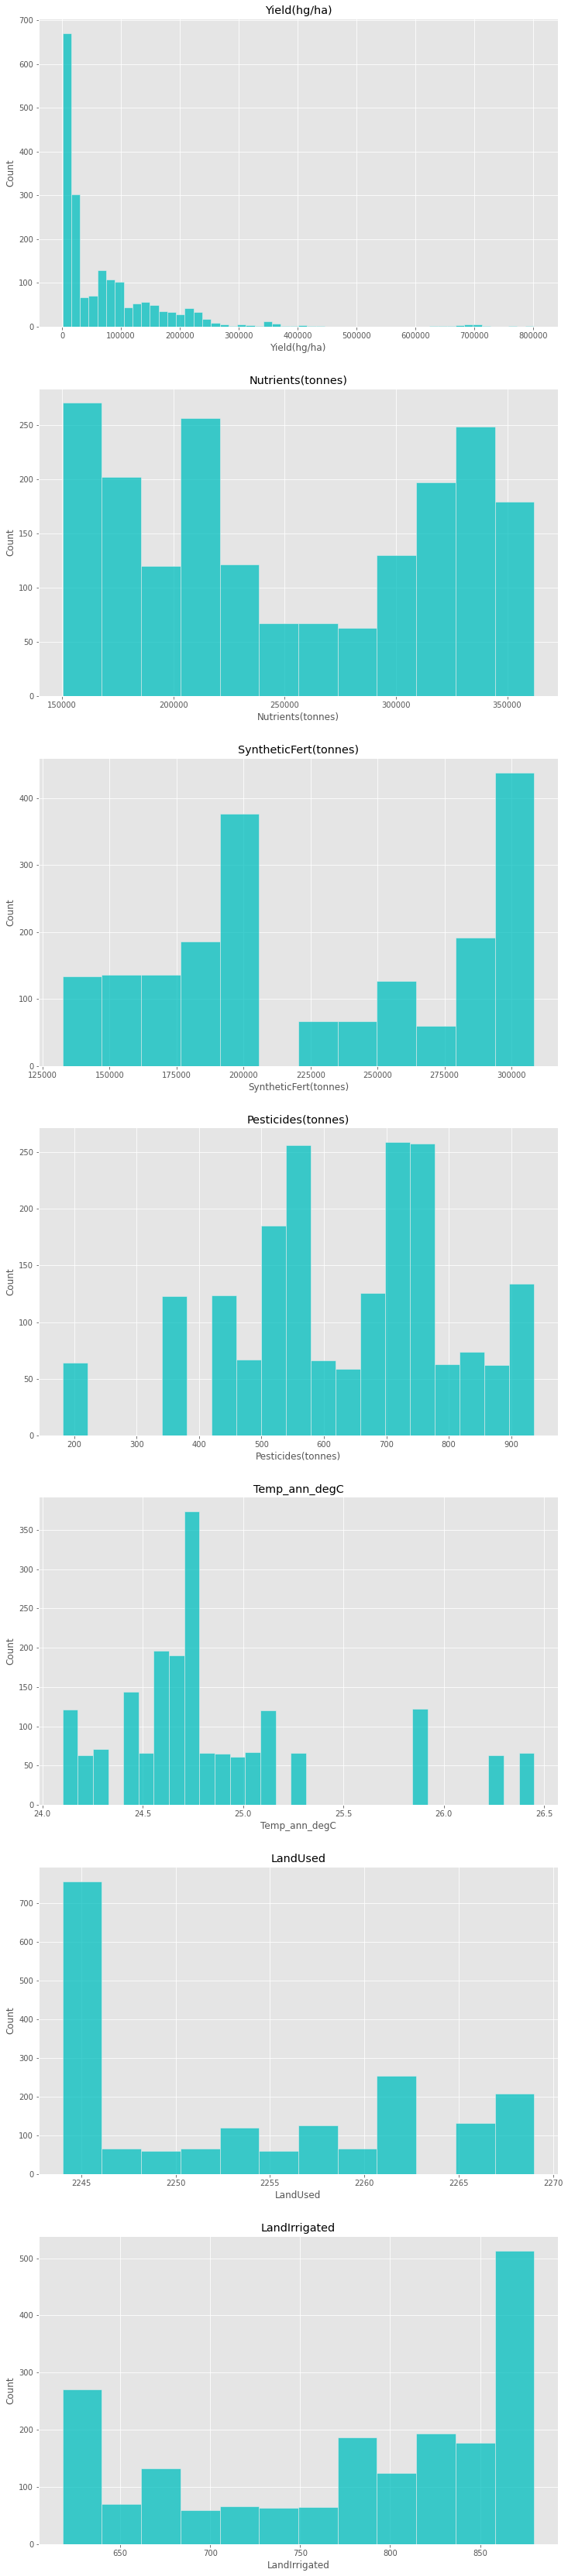

In [15]:
features = ['Yield(hg/ha)', 'Nutrients(tonnes)','SyntheticFert(tonnes)', 'Pesticides(tonnes)', 'Temp_ann_degC','LandUsed', 'LandIrrigated']
plt.style.use("ggplot")
f, ax = plt.subplots(7, figsize = (12,60))
for i in range(7):
    sns.histplot(crop_df[features[i]], color="c", ax=ax[i])
    ax[i].set_title(features[i])
plt.plot()

In [16]:
crop_X = train_set.drop("Yield(hg/ha)", axis=1)
crop_y = train_set[["Yield(hg/ha)"]].to_numpy()

**Dealing with null values**: Currently there are no null values in the dataset. We don't know if we may encounter null values in the future. So for this purpose we create an imputer that deals with any null values in the dataset.

In [17]:
crop_X_num = crop_X.drop("CropItem", axis=1)
crop_X_cat = crop_X[["CropItem"]].copy()

In [18]:
crop_X_num.shape, crop_X_cat.shape

((1920, 7), (1920, 1))

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
imputer.fit(crop_X_num)
imputer.statistics_

array([2.00400e+03, 2.30083e+05, 2.04972e+05, 6.62000e+02, 2.47300e+01,
       2.25300e+03, 7.99000e+02])

In [20]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
crop_cat_1_hot = cat_encoder.fit_transform(crop_X_cat)
crop_cat_1_hot

<1920x80 sparse matrix of type '<class 'numpy.float64'>'
	with 1920 stored elements in Compressed Sparse Row format>

In [21]:
crop_cat_1_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

The above imputer and the onehot encoder are used for dealing with null values and dealing with categorical values respectively. Pipelines can be created
implementing these classes

### Feature Scaling and Transformation Pipelines

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

In [23]:
numerical_pipeline = Pipeline([
                                ('imputer', SimpleImputer(strategy="median")), 
                                ('std_scaler', StandardScaler())
                             ])

In [24]:
crop_num_transformed = numerical_pipeline.fit_transform(crop_X_num)

In [25]:
crop_num_transformed

array([[-1.64597193, -1.44574164, -1.65970117, ..., -1.16275558,
         1.52846646, -1.71905509],
       [-0.15224522, -0.60132738, -0.59576786, ..., -0.26472327,
        -0.08246431,  0.15123625],
       [ 0.307363  ,  0.41493186,  0.41590868, ..., -0.17668089,
        -1.00299619,  0.49919743],
       ...,
       [ 0.65206916,  1.39158339,  1.03172157, ...,  0.45722427,
        -1.11806267,  0.76016832],
       [-1.18636371, -1.17322709, -1.07154854, ..., -0.72254366,
         1.41339998, -1.43633663],
       [ 0.65206916,  1.39158339,  1.03172157, ...,  0.45722427,
        -1.11806267,  0.76016832]])

In [26]:
numerical_attributes = list(crop_X_num)
categorical_attributes = ["CropItem"]

In [27]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
                                    ("numerical", numerical_pipeline, numerical_attributes),
                                    ("categorical", OneHotEncoder(), categorical_attributes)
                                  ])

The above pipeline `full_pipeline` preprocesses the data by:
- Replacing null values with median value of the column
- Performing standard scaling to all the numerical attributes
- Encoding the categorical attributes

In [28]:
crop_data_prepared = full_pipeline.fit_transform(crop_X)

## Selecting and training the model
This is a regression problem

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR

In [30]:
#creating model instances for all the model classes 
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()
lin_svr_reg = LinearSVR()

#creating a list of all the models
model_list = [lin_reg, dt_reg, rf_reg, gb_reg, lin_svr_reg]
model_dict = {
    lin_reg: 'Linear Regression',
    dt_reg: 'Decision Tree Regressor',
    rf_reg: 'Random Forest Regressor',
    gb_reg: 'Gradient Boosting Regressor',
    lin_svr_reg : 'Linear SVR'
}

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [32]:
def display_scores(rmse_scores, r2score):
    """
    Print scores
    """
    print(f"Scores: {rmse_scores}")
    print(f"Mean Score: {rmse_scores.mean()}")
    print(f"Std Dev: {rmse_scores.std()}")
    print(f"R2 score: {r2score}")

In [33]:
def train_model(reg_model, data_x=crop_data_prepared, data_y=crop_y):
    """
    Trains the model by 10-fold cross validation and find the cross_val_score and r2_score
    """
    reg_model.fit(data_x, data_y)
    model_cross_val_scores = cross_val_score(reg_model, data_x, data_y, scoring="neg_mean_squared_error", cv=10)
    model_rmse_scores = np.sqrt(-model_cross_val_scores)
    model_predictions = reg_model.predict(data_x)
    model_r2_score = (r2_score(data_y, model_predictions)).round(5)
    print(model_dict[reg_model])
    model_dict[reg_model] = [model_dict[reg_model], model_rmse_scores.mean(), model_rmse_scores.std(), model_r2_score]
    display_scores(model_rmse_scores, model_r2_score)
    print("-------------------------------------------------------------\n")

In [34]:
for model in model_list:
    train_model(model, crop_data_prepared, crop_y)

Linear Regression
Scores: [24500.71913728 18294.0105254  20945.6220764  20953.88297775
 21143.57436852 23235.30491286 13880.39458664 19054.17545791
 21974.20633781 19704.47373722]
Mean Score: 20368.636411779
Std Dev: 2787.758593874445
R2 score: 0.96549
-------------------------------------------------------------

Decision Tree Regressor
Scores: [10867.2538411  18715.59468513 18608.08150931 11774.97560291
 15141.98116824 14088.67609887 14520.79698302 12047.47500349
 15573.88270609 15640.85021837]
Mean Score: 14697.956781651214
Std Dev: 2528.432475157655
R2 score: 1.0
-------------------------------------------------------------



C:\Users\hp\AppData\Local\Temp\ipykernel_17212\3036607249.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_model.fit(data_x, data_y)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: D

Random Forest Regressor
Scores: [11185.06271011 11040.74318119 14117.63024366 12465.13614601
 12866.7030945  12404.4894769  10855.18335464 10245.99605262
 12582.41679729  8971.23899732]
Mean Score: 11673.460005425102
Std Dev: 1415.3884894415976
R2 score: 0.99829
-------------------------------------------------------------



C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vecto

Gradient Boosting Regressor
Scores: [36187.59526258 33928.11918934 36036.18004392 33156.63270071
 35767.50528685 35463.89484731 34796.39606925 34317.8838542
 34461.62458197 35212.50538331]
Mean Score: 34932.833721942676
Std Dev: 929.0789199389196
R2 score: 0.89896
-------------------------------------------------------------

Linear SVR
Scores: [136967.35034441 151619.07967226 124081.29758708 154242.71951946
 139699.9818333  144308.82220191 104085.89553275 100002.03076308
 103183.82952138 119623.30337815]
Mean Score: 127781.43103537837
Std Dev: 19458.885947331702
R2 score: -0.50203
-------------------------------------------------------------



C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning

In [35]:
training_results = {}
for model in model_list:
    training_results[model_dict[model][0]] = [model_dict[model][1], model_dict[model][3]]

training_results_df = pd.DataFrame(training_results, index = ['Train RMSE', 'Train R2 Score'])
training_results_df = training_results_df.T
training_results_df.reset_index(inplace=True)
training_results_df.rename(columns = {'index':'Model'}, inplace=True)
training_results_df

,Model,Train RMSE,Train R2 Score
0,Linear Regression,20368.636412,0.96549
1,Decision Tree Regressor,14697.956782,1.00000
2,Random Forest Regressor,11673.460005,0.99829
3,Gradient Boosting Regressor,34932.833722,0.89896
4,Linear SVR,127781.431035,-0.50203


## Evaluation on the test set

In [36]:
test_X = test_set.drop("Yield(hg/ha)", axis=1)
test_y = test_set["Yield(hg/ha)"].copy()

test_prepared = full_pipeline.transform(test_X)

In [37]:
test_results = {}
test_predictions = {}

In [38]:
from sklearn.metrics import mean_squared_error

def evaluate_model_on_test_set(reg_model, data_x=test_prepared, data_y=test_y, test_predictions=test_predictions):
    test_pred = test_predictions[model_dict[reg_model][0]] = reg_model.predict(data_x)
    model_rmse = np.sqrt(mean_squared_error(data_y, test_pred))
    model_r2score = (r2_score(data_y, test_pred)).round(5)
    test_results[model_dict[reg_model][0]] = [model_rmse, model_r2score]
    print(model_dict[reg_model][0], ":")
    print(f"RMSE: {model_rmse}\nR2 score: {model_r2score}")
    print("----------------------------------------------------\n")

In [39]:
for model in model_list:
    evaluate_model_on_test_set(model, test_prepared, test_y, test_predictions)

Linear Regression :
RMSE: 20178.544326590316
R2 score: 0.96054
----------------------------------------------------

Decision Tree Regressor :
RMSE: 13829.75117357202
R2 score: 0.98147
----------------------------------------------------

Random Forest Regressor :
RMSE: 11659.739142398472
R2 score: 0.98683
----------------------------------------------------

Gradient Boosting Regressor :
RMSE: 34117.728768513436
R2 score: 0.8872
----------------------------------------------------

Linear SVR :
RMSE: 122718.7732120509
R2 score: -0.45943
----------------------------------------------------



In [40]:
test_results_df = pd.DataFrame(test_results, index = ['Test RMSE', 'Test R2 Score'])
test_results_df = test_results_df.T
test_results_df.reset_index(inplace = True)
test_results_df.rename(columns = {'index': 'Model'}, inplace=True)
test_results_df

,Model,Test RMSE,Test R2 Score
0,Linear Regression,20178.544327,0.96054
1,Decision Tree Regressor,13829.751174,0.98147
2,Random Forest Regressor,11659.739142,0.98683
3,Gradient Boosting Regressor,34117.728769,0.88720
4,Linear SVR,122718.773212,-0.45943


In [41]:
def plot_model_on_test(model, test_y = test_y):
    plt.style.use('ggplot')
    plt.scatter(test_y, test_predictions[model_dict[model][0]], label = model_dict[model][0], alpha = 0.4)
    plt.xlabel('test_y')
    plt.ylabel('test predictions')
    plt.legend()
    plt.show()

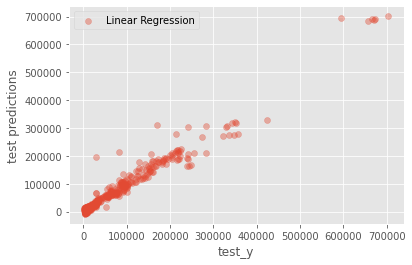

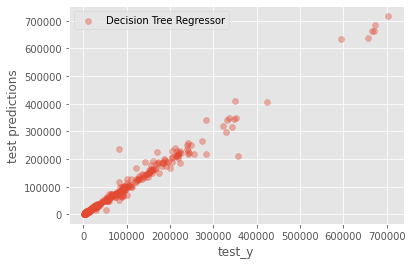

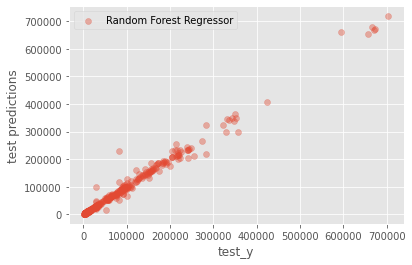

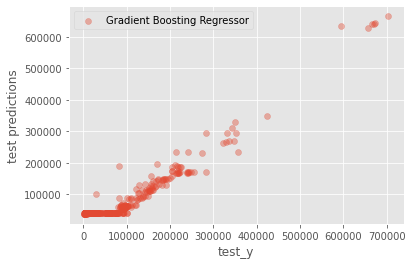

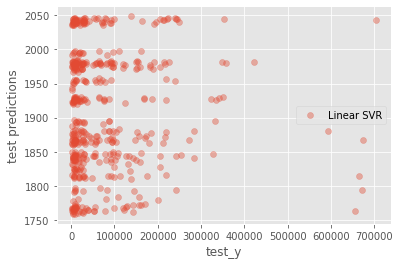

In [42]:
for model in model_list:
    plot_model_on_test(model)

In [43]:
whole_results_df = pd.merge(training_results_df, test_results_df, on = ['Model'])
whole_results_df

,Model,Train RMSE,Train R2 Score,Test RMSE,Test R2 Score
0,Linear Regression,20368.636412,0.96549,20178.544327,0.96054
1,Decision Tree Regressor,14697.956782,1.00000,13829.751174,0.98147
2,Random Forest Regressor,11673.460005,0.99829,11659.739142,0.98683
3,Gradient Boosting Regressor,34932.833722,0.89896,34117.728769,0.88720
4,Linear SVR,127781.431035,-0.50203,122718.773212,-0.45943


### **Saving the models**

In [44]:
import joblib

In [45]:
full_pipeline.fit(crop_X)
full_pipeline.fit(test_X)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Year', 'Nutrients(tonnes)',
                                  'SyntheticFert(tonnes)', 'Pesticides(tonnes)',
                                  'Temp_ann_degC', 'LandUsed',
                                  'LandIrrigated']),
                                ('categorical', OneHotEncoder(), ['CropItem'])])

In [47]:
crop_x_trans = full_pipeline.fit_transform(crop_X)
test_x_trans = full_pipeline.fit_transform(test_X)

In [49]:
rf_reg.fit(crop_x_trans, crop_y)

C:\Users\hp\AppData\Local\Temp\ipykernel_17212\74334964.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(crop_x_trans, crop_y)


RandomForestRegressor()

In [50]:
rf_reg.fit(test_x_trans, test_y)

RandomForestRegressor()

In [52]:
joblib.dump(rf_reg, "rf_reg.pkl")

['rf_reg.pkl']

In [53]:
joblib.dump(full_pipeline, "full_pipeline.pkl")

['full_pipeline.pkl']

In [54]:
import pickle

In [56]:
pickle.dump(rf_reg, open("rf_regmodel.sav", "wb"))

In [57]:
pickle.dump(full_pipeline, open("full_pipeline_model.sav", "wb"))

# user data

In [69]:
user_input = {
    "CropItem": "Apples", 
    "Year": 2022,
    "Nutrients(tonnes)": 100,
    "SyntheticFert(tonnes)": 136,
    "Pesticides(tonnes)": 125,
    "Temp_ann_degC": 24.21,
    "LandUsed": 3,
    "LandIrrigated": 2.5,
}

In [70]:
def convert_units(user_input: dict) -> dict:
    user_input["Nutrients(tonnes)"] /= 1000
    user_input["SyntheticFert(tonnes)"] /= 1000
    user_input["Pesticides(tonnes)"] /= 1000
    user_input["LandUsed"] /= 2471.052
    user_input["LandIrrigated"] /= 2471.052
    return user_input

In [71]:
user_input = convert_units(user_input)

In [72]:
user_df = pd.DataFrame(user_input, columns=list(user_input.keys()), index=[0])

In [73]:
user_df

,CropItem,Year,Nutrients(tonnes),SyntheticFert(tonnes),Pesticides(tonnes),Temp_ann_degC,LandUsed,LandIrrigated
0,Apples,2022,0.1,0.136,0.125,24.21,0.001214,0.001012


In [74]:
dpm = pickle.load(open("full_pipeline_model.sav", "rb"))

In [75]:
user_processed = dpm.transform(user_df)
user_processed

<1x87 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [76]:
rfm = pickle.load(open("rf_regmodel.sav", "rb"))

In [77]:
rfm.predict(user_processed)

array([75441.21])